# CWRU Bearing Fault Data - Data Visualizations (divided by load)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import re
import scipy.io
import pickle
import math

## 48k Drive-End Bearing Fault Data + Normal Baseline Data (48k)

In [3]:
with open('/content/drive/MyDrive/Praca dyplomowa/48kdrive-end_normalbaseline_loadsplit_data.pkl', 'rb') as f:
    data = pickle.load(f)


### Visualising data for each laod

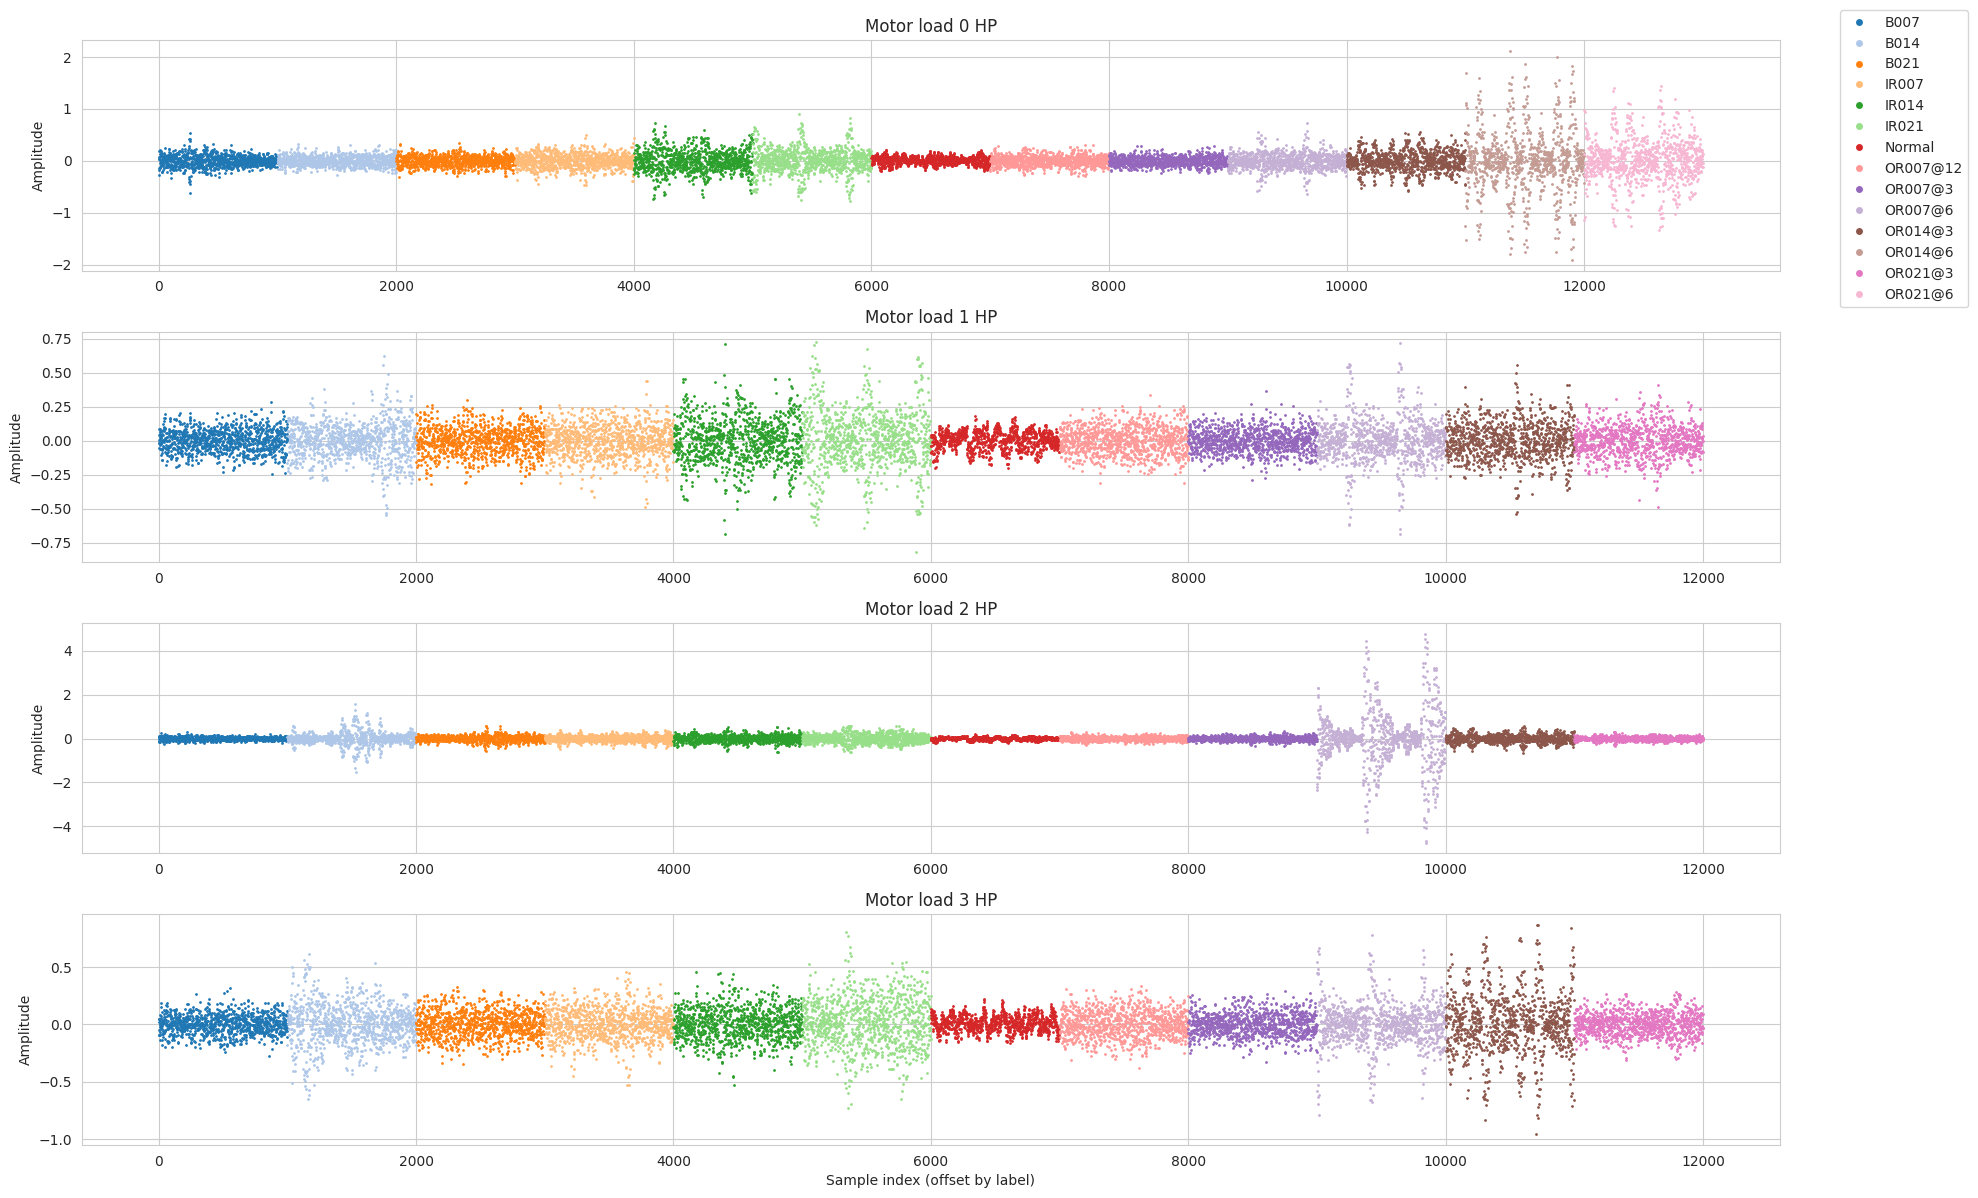

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style('whitegrid')
max_points = 1000
spacing = max_points

unique_loads = sorted(data['load'].unique())
unique_labels = sorted(data['label'].unique())
palette = sns.color_palette('tab20', n_colors=len(unique_labels))
label_color_map = dict(zip(unique_labels, palette))

fig, ax = plt.subplots(len(unique_loads), 1, figsize=(18, 12), sharex=False)

if len(unique_loads) == 1:
    ax = [ax]

for i, load in enumerate(unique_loads):
    load_df = data[data['load'] == load]
    current_offset = 0

    for label in unique_labels:
        subset = load_df[load_df['label'] == label]
        for j, (_, row) in enumerate(subset.iterrows()):
            signal = row['signal'][:max_points]
            x = np.arange(len(signal)) + current_offset
            ax[i].scatter(x, signal, color=label_color_map[label], s=1)
            current_offset += spacing

    ax[i].set_title(f"Motor load {load} HP", fontsize=12)
    ax[i].set_ylabel("Amplitude")
    ax[i].grid(True)


handles = [plt.Line2D([0], [0], marker='o', color='w', label=lbl,
                      markerfacecolor=label_color_map[lbl], markersize=6)
           for lbl in unique_labels]
fig.legend(handles, unique_labels, loc='upper right', bbox_to_anchor=(1.1, 1))

plt.xlabel("Sample index (offset by label)")
plt.tight_layout()
plt.show()


### Visualsing data for each load and fault type

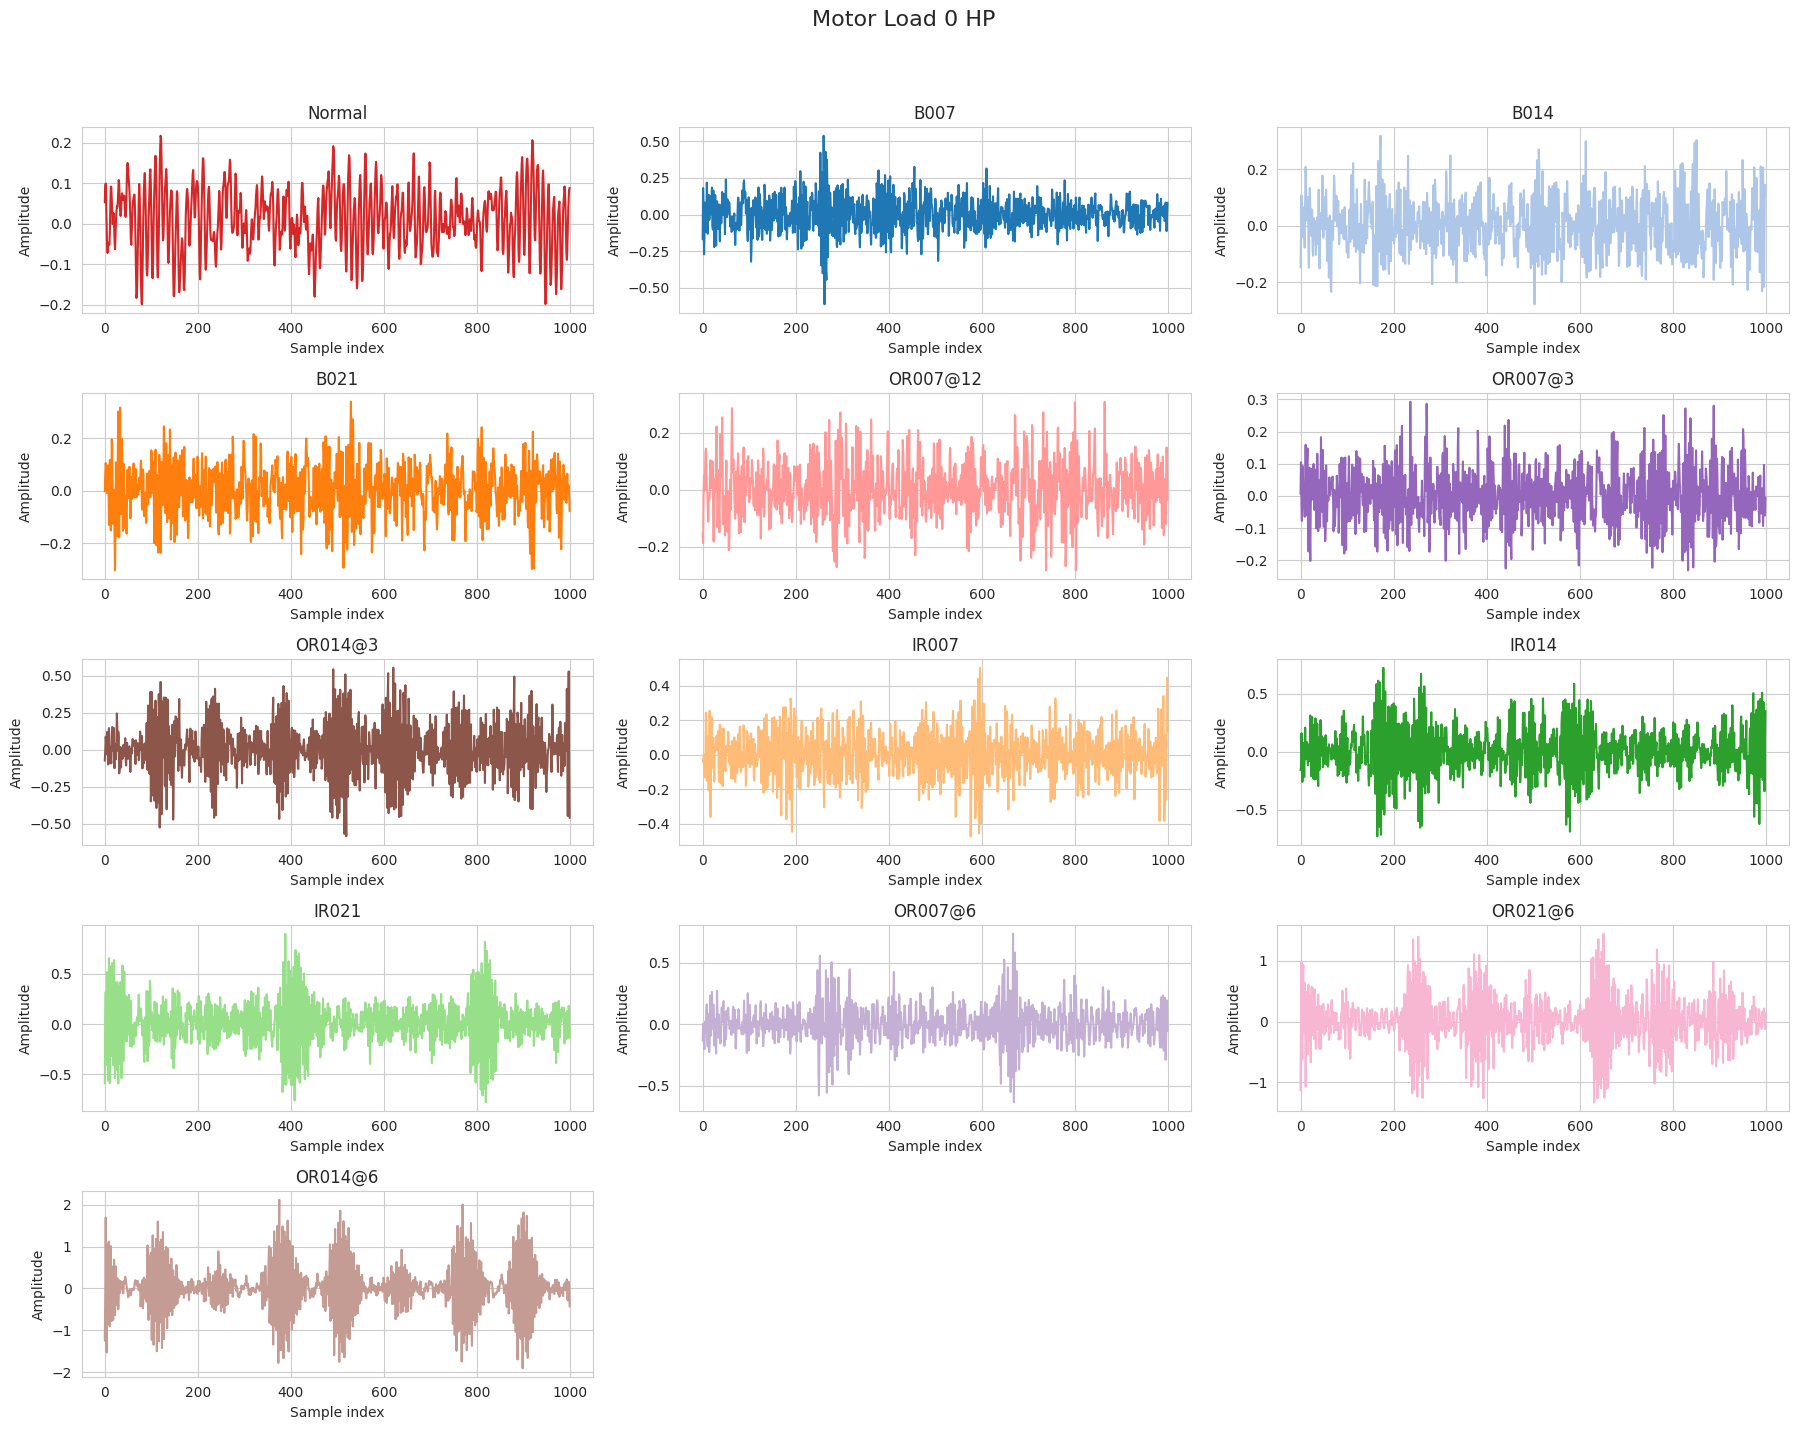

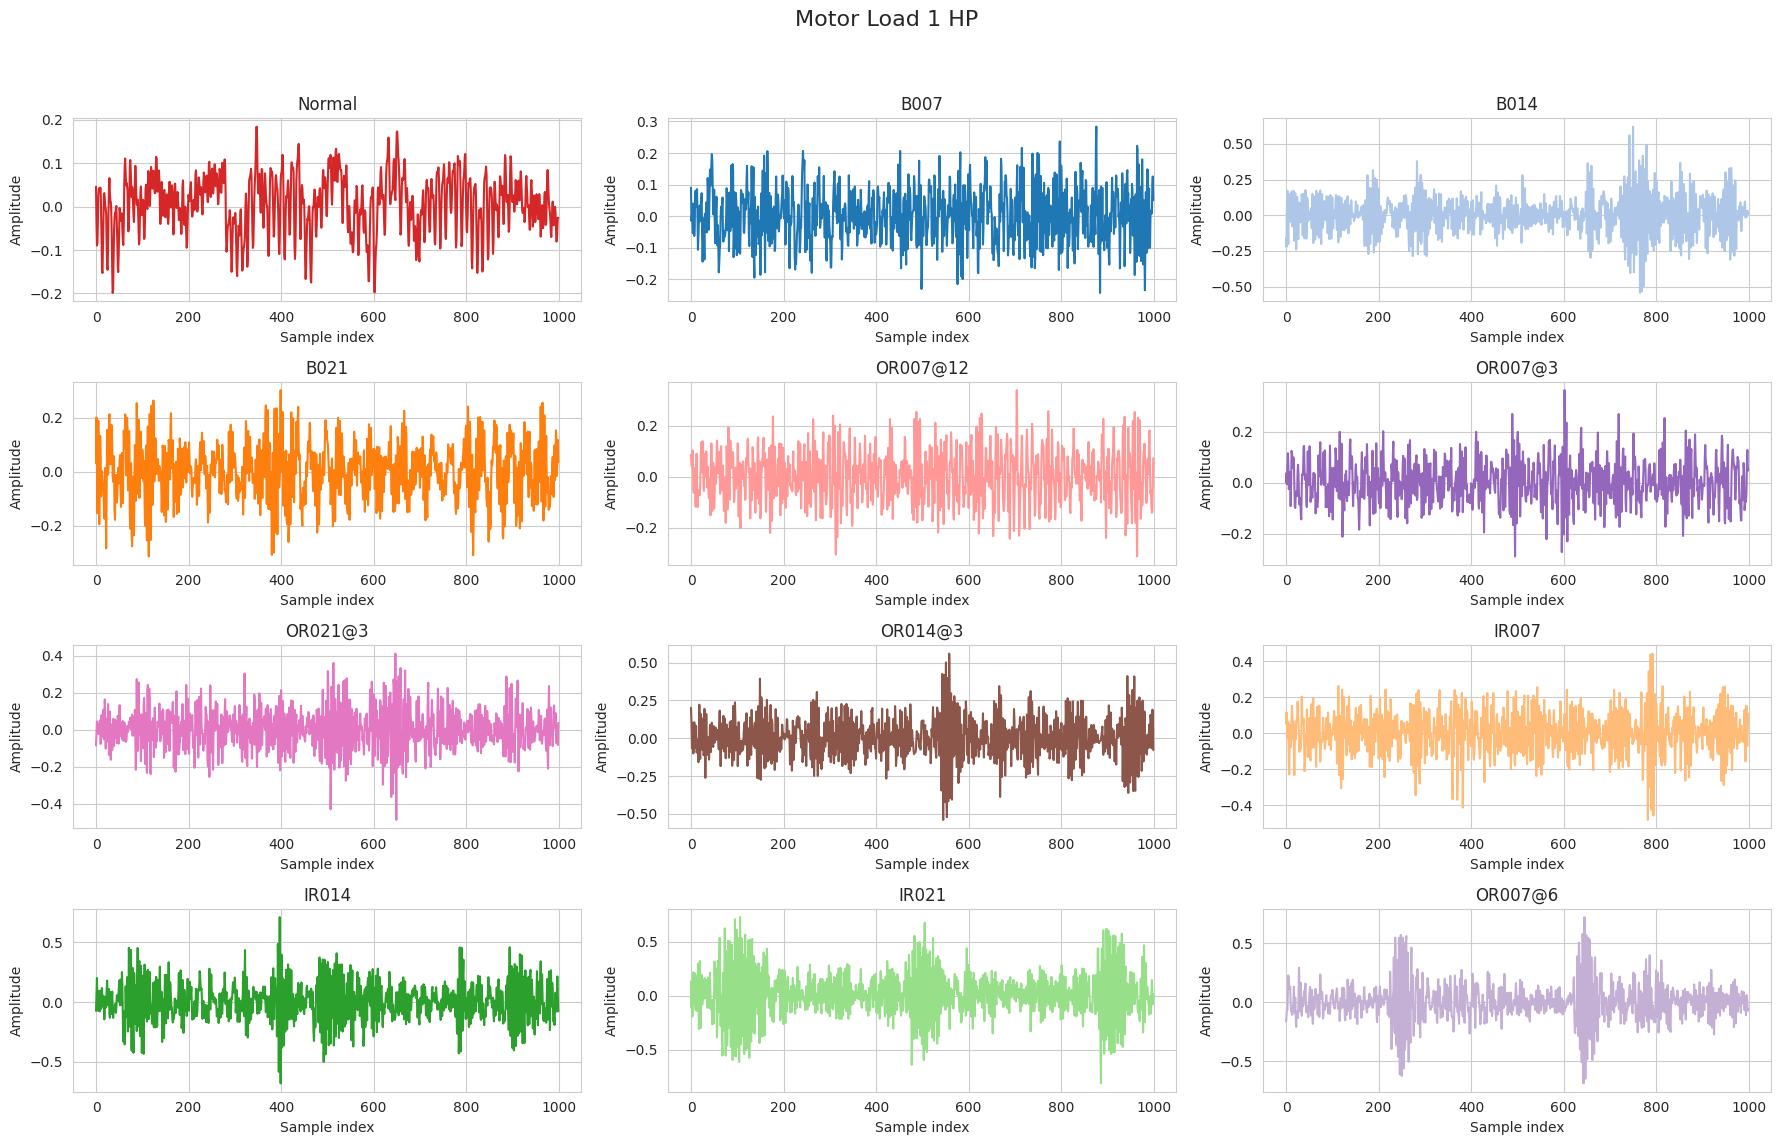

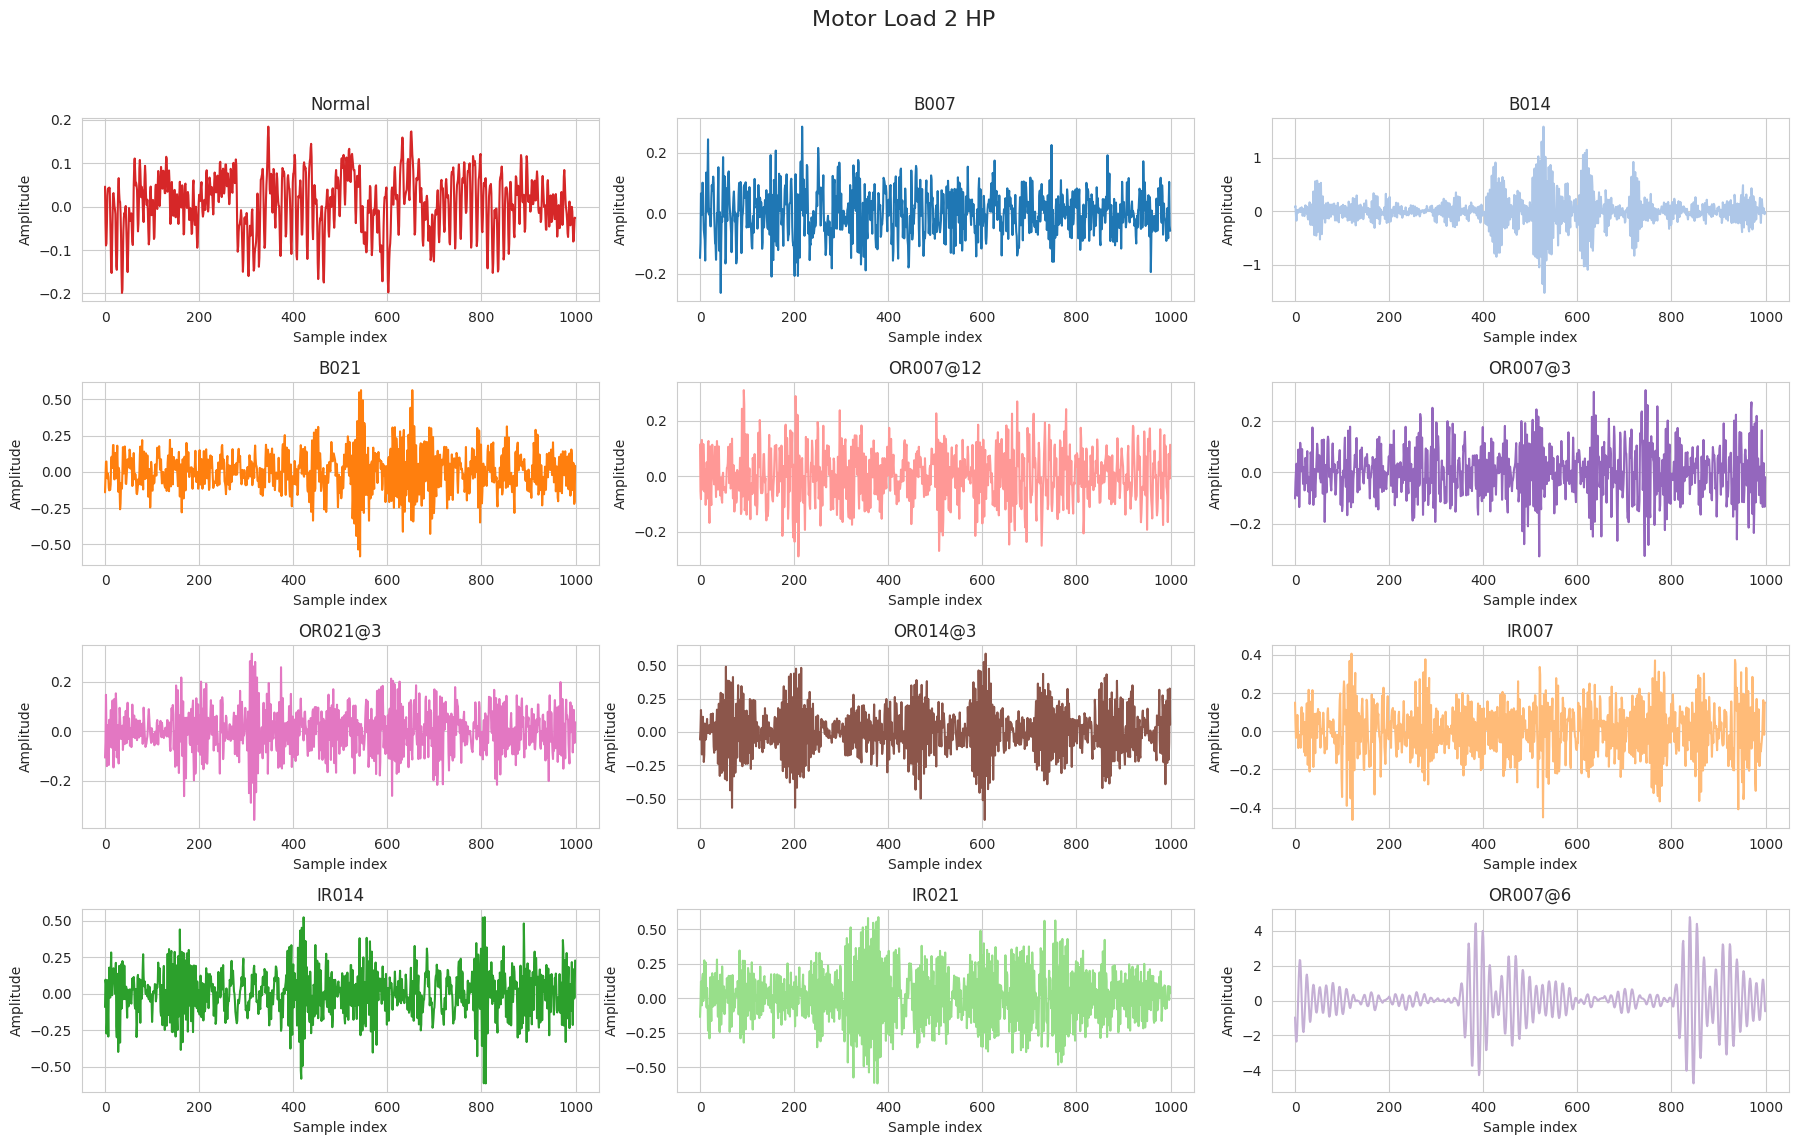

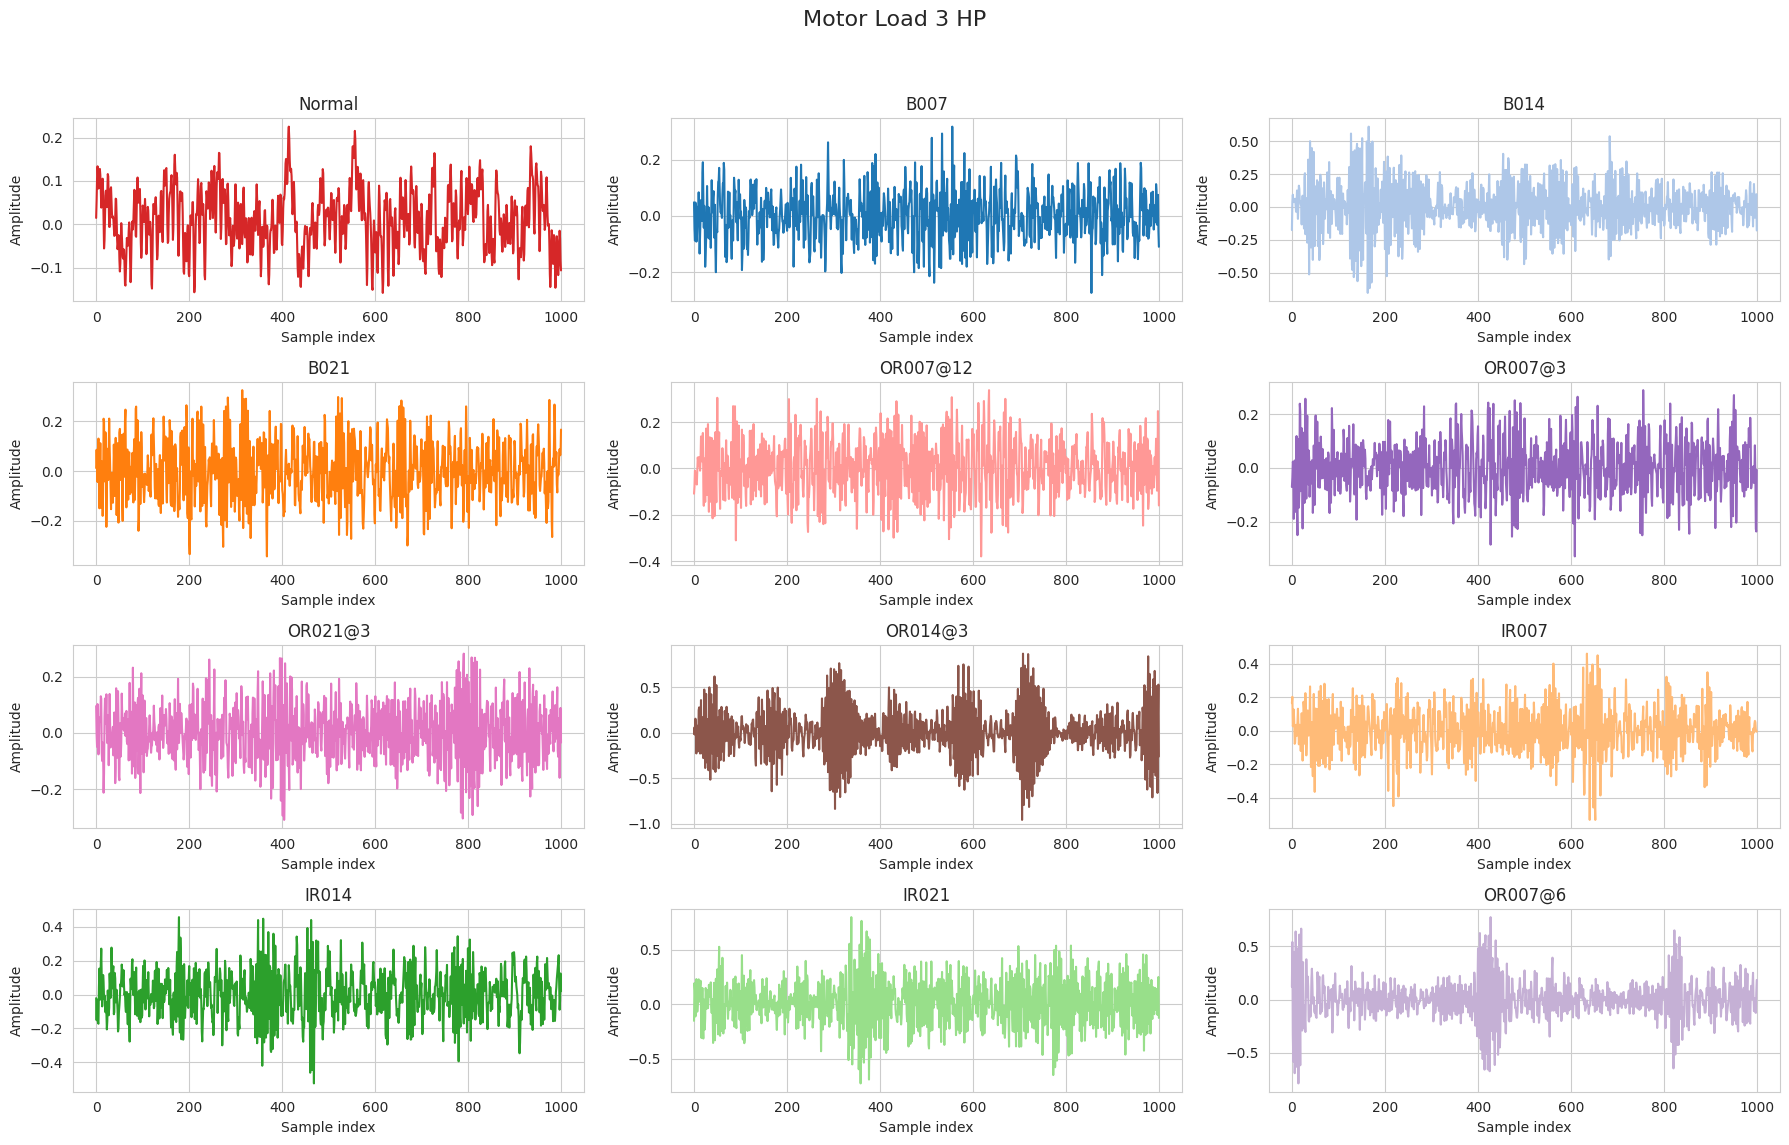

In [5]:
sns.set_style('whitegrid')
max_points = 1000

unique_loads = sorted(data['load'].unique())
unique_labels = sorted(data['label'].unique())
palette = sns.color_palette('tab20', n_colors=len(unique_labels))
label_color_map = dict(zip(unique_labels, palette))

for load in unique_loads:
    load_df = data[data['load'] == load]

    labels_in_load = load_df['label'].unique()
    num_labels = len(labels_in_load)

    cols = 3
    rows = math.ceil(num_labels / cols)

    fig, axes = plt.subplots(rows, cols, figsize=(18, rows * 3), sharex=False)
    axes = axes.flatten()

    for i, label in enumerate(labels_in_load):
        subset = load_df[load_df['label'] == label]

        if not subset.empty:
            signal = subset.iloc[0]['signal'][:max_points]
            x = np.arange(len(signal))
            axes[i].plot(x, signal, color=label_color_map[label])
            axes[i].set_title(f"{label}")
            axes[i].set_xlabel("Sample index")
            axes[i].set_ylabel("Amplitude")
            axes[i].grid(True)

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    fig.suptitle(f"Motor Load {load} HP", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()
